In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

In [2]:
# 2. Data Preprocessing

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape data to include the color channel (28x28x1) and normalize
x_train = np.expand_dims(x_train, axis=-1).astype('float32') / 255
x_test = np.expand_dims(x_test, axis=-1).astype('float32') / 255

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [3]:
# 3. Define the CNN model

model = Sequential()

# Add convolutional layers and pooling layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and feed into fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 10 output classes (digits 0-9)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

e:\B.E\DL\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# 4. Train the model
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.2, verbose=2)

Epoch 1/10
375/375 - 9s - 25ms/step - accuracy: 0.9313 - loss: 0.2329 - val_accuracy: 0.9723 - val_loss: 0.0887
Epoch 2/10
375/375 - 8s - 21ms/step - accuracy: 0.9800 - loss: 0.0655 - val_accuracy: 0.9824 - val_loss: 0.0581
Epoch 3/10
375/375 - 8s - 21ms/step - accuracy: 0.9858 - loss: 0.0465 - val_accuracy: 0.9868 - val_loss: 0.0490
Epoch 4/10
375/375 - 7s - 20ms/step - accuracy: 0.9895 - loss: 0.0343 - val_accuracy: 0.9870 - val_loss: 0.0442
Epoch 5/10
375/375 - 8s - 20ms/step - accuracy: 0.9913 - loss: 0.0269 - val_accuracy: 0.9880 - val_loss: 0.0465
Epoch 6/10
375/375 - 8s - 21ms/step - accuracy: 0.9933 - loss: 0.0216 - val_accuracy: 0.9892 - val_loss: 0.0375
Epoch 7/10
375/375 - 8s - 21ms/step - accuracy: 0.9943 - loss: 0.0177 - val_accuracy: 0.9885 - val_loss: 0.0397
Epoch 8/10
375/375 - 8s - 20ms/step - accuracy: 0.9952 - loss: 0.0147 - val_accuracy: 0.9889 - val_loss: 0.0404
Epoch 9/10
375/375 - 11s - 28ms/step - accuracy: 0.9969 - loss: 0.0096 - val_accuracy: 0.9887 - val_loss

Test Accuracy: 0.9874
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


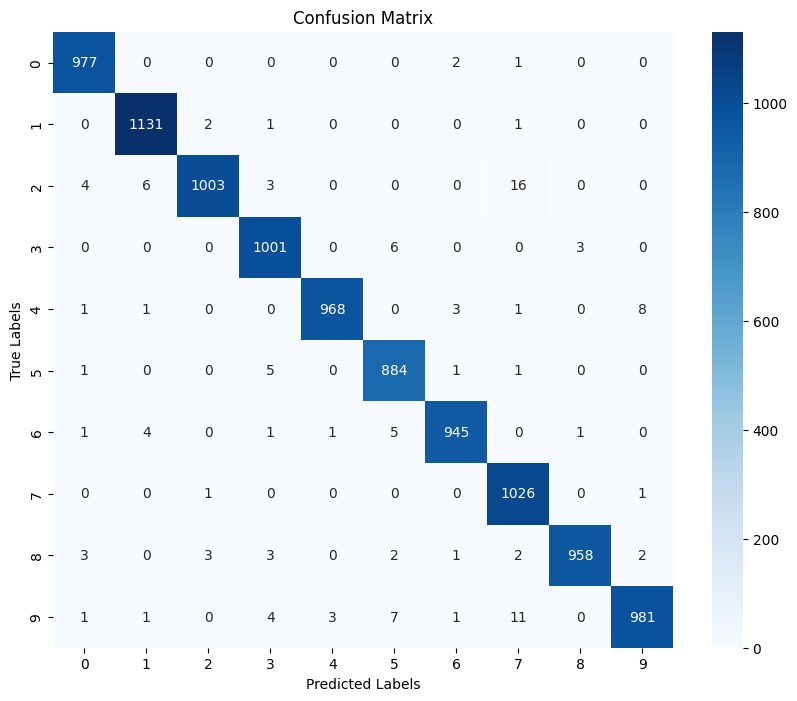

In [6]:
# 5. Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

# 6. Confusion Matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class with highest probability

# Convert y_test to class labels
y_test_classes = np.argmax(y_test, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()